# Modelo de Regresion Lineal
## Jacobo P. Marín
#### Universidad Nacional Abierta y a Distancia
#### Dataset: Vehicle dataset

### 1. Importación de Librerías y Datos

In [9]:
import pandas as pd  # Para manipular datos
import numpy as np   # Para cálculos numéricos
import matplotlib.pyplot as plt  # Para gráficos
import seaborn as sns  # Para gráficos estadísticos

# Configuración para mostrar todas las columnas
pd.set_option('display.max_columns', None)

# Leer el dataset
df = pd.read_csv('car data.csv')

# Mostrar las primeras filas
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
df.columns = df.columns.str.strip()
print("\nNombres de las columnas despues de limpiar en car data:")
print(df.columns.tolist())


Nombres de las columnas despues de limpiar en car data:
['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']


### 2. Análisis Exploratorio

In [13]:
#Estadisticas descriptivas
df.describe()

#Informacion de columnas
df.info()

#Buscar valores nulos
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

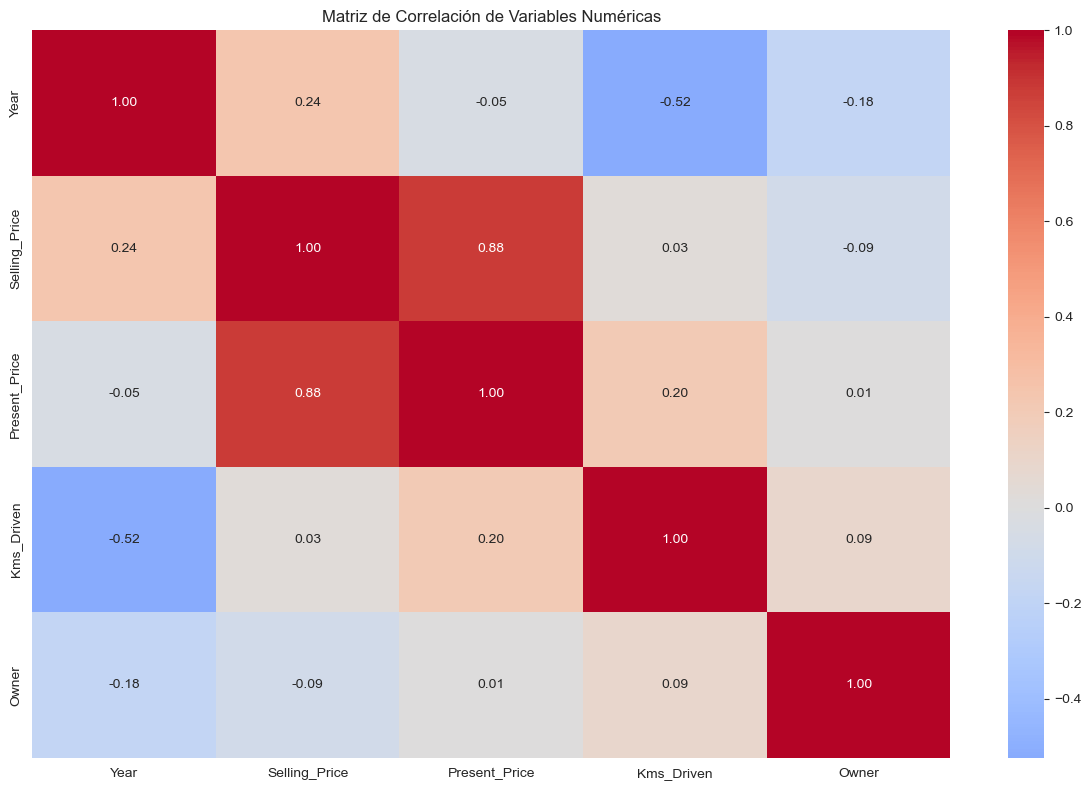

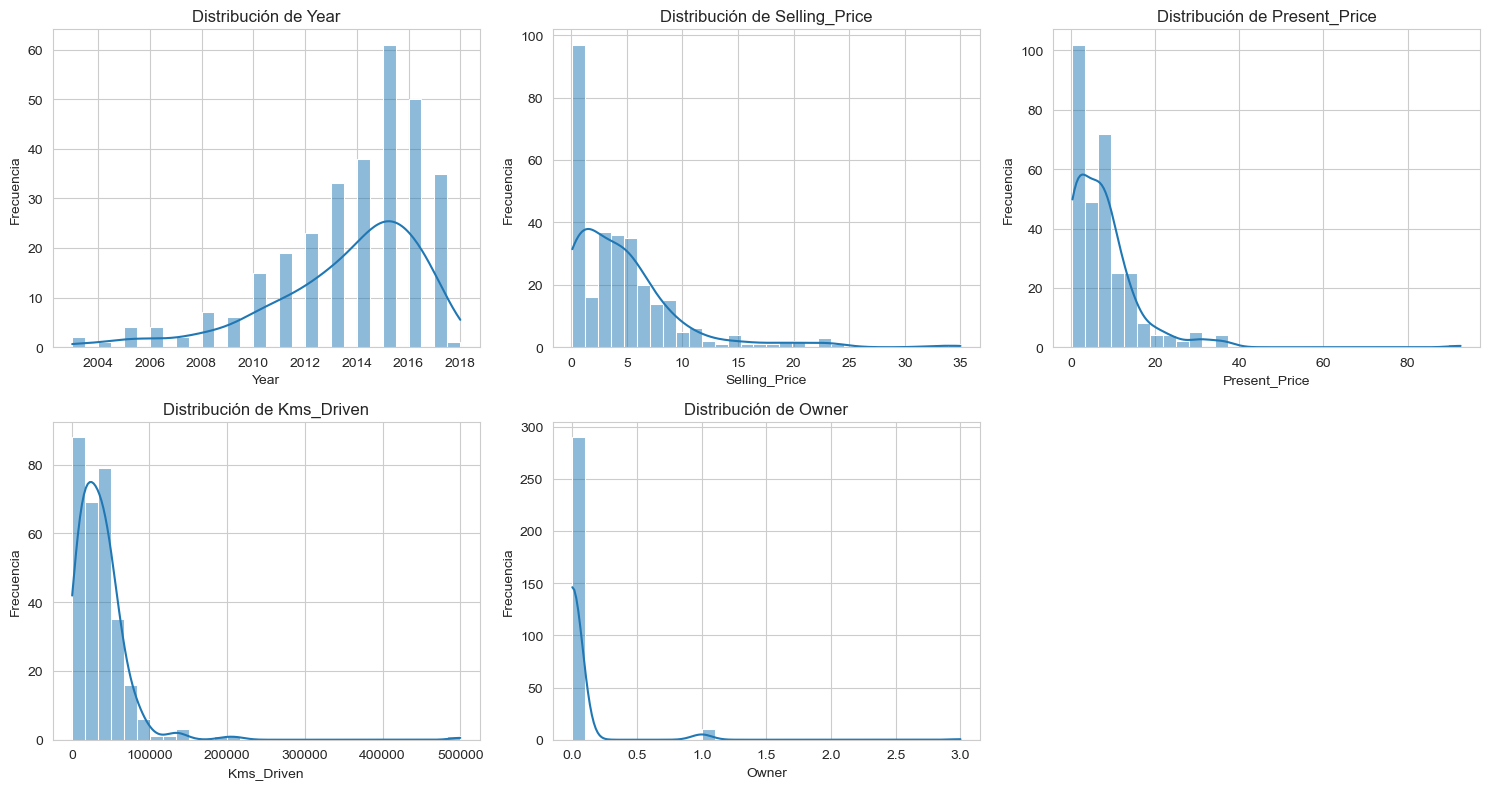


Resumen Estadístico:
              Year  Selling_Price  Present_Price     Kms_Driven       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.644115   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000


In [15]:
# Análisis completo de distribuciones y correlaciones
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo de seaborn
sns.set_style("whitegrid")

# 1. Matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), 
            annot=True, 
            cmap='coolwarm', 
            center=0,
            fmt='.2f')
plt.title('Matriz de Correlación de Variables Numéricas')
plt.tight_layout()
plt.show()

# 2. Histogramas de todas las variables numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(15, 4*n_rows))

for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i+1)
    sns.histplot(data=df, x=col, bins=30, kde=True)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

# 3. Resumen estadístico
print("\nResumen Estadístico:")
print(df[numeric_cols].describe())

In [17]:
# lectura de datos
df.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


### 3. Preprocesamiento

In [19]:
# Verificar duplicados
print("\nNúmero de filas duplicadas:", df.duplicated().sum())

# Mostrar tipos de datos
print("Tipos de datos en cada columna:")
print(df.dtypes)

# Se separan las columnas numericas y categoricas
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

print("\nColumnas numéricas:", list(numeric_columns))
print("Columnas categóricas:", list(categorical_columns))


Número de filas duplicadas: 2
Tipos de datos en cada columna:
Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

Columnas numéricas: ['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner']
Columnas categóricas: ['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission']


In [21]:
##Tratar valores nulos según el tipo de dato
df_clean = df.copy()

# Para columnas numéricas: usar la media
for column in numeric_columns:
    df_clean[column] = df_clean[column].fillna(df_clean[column].mean())

# Para columnas categóricas: usar la moda (valor más frecuente)
for column in categorical_columns:
    df_clean[column] = df_clean[column].fillna(df_clean[column].mode()[0])

# 4. Verificar que no queden valores nulos
print("\nValores nulos después del tratamiento:")
print(df_clean.isnull().sum())


Valores nulos después del tratamiento:
Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64


In [23]:
# Diccionario de mapeo para reemplazar los valores en 'Transmission'
Transmission_mapping = {
    'Manual': 0,
    'Automatic': 1,
}

# Reemplazar los valores directamente en la columna 'Transmission'
df_clean['Transmission'] = df_clean['Transmission'].replace(Transmission_mapping)

# Verificar los primeros registros para confirmar la transformación
print("\nPrimeras filas después del reemplazo:")
print(df_clean[['Transmission']].head(10))

# Verificar la distribución de los nuevos valores
print("\nDistribución de valores en 'Transmission':")
print(df_clean['Transmission'].value_counts().sort_index())


Primeras filas después del reemplazo:
   Transmission
0             0
1             0
2             0
3             0
4             0
5             0
6             0
7             0
8             0
9             0

Distribución de valores en 'Transmission':
Transmission
0    261
1     40
Name: count, dtype: int64


C:\Users\USER\AppData\Local\Temp\ipykernel_4028\1119748311.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean['Transmission'] = df_clean['Transmission'].replace(Transmission_mapping)


In [25]:
# Crear una tabla de resumen para comparar 'Owner' y otra columna relevante (opcional)
tabla_comparativa = df_clean[['Owner', 'Year', 'Kms_Driven', 'Selling_Price','Present_Price', 'Transmission', 'Fuel_Type']].head(10)
print("\nTabla comparativa (Owner, Year, Kms_Driven, Selling_Price, Pr0esent_Price, Transmission, Fuel_Type):")
print(tabla_comparativa)


Tabla comparativa (Owner, Year, Kms_Driven, Selling_Price, Pr0esent_Price, Transmission, Fuel_Type):
   Owner  Year  Kms_Driven  Selling_Price  Present_Price  Transmission  \
0      0  2014       27000           3.35           5.59             0   
1      0  2013       43000           4.75           9.54             0   
2      0  2017        6900           7.25           9.85             0   
3      0  2011        5200           2.85           4.15             0   
4      0  2014       42450           4.60           6.87             0   
5      0  2018        2071           9.25           9.83             0   
6      0  2015       18796           6.75           8.12             0   
7      0  2015       33429           6.50           8.61             0   
8      0  2016       20273           8.75           8.89             0   
9      0  2015       42367           7.45           8.92             0   

  Fuel_Type  
0    Petrol  
1    Diesel  
2    Petrol  
3    Petrol  
4    Diesel  

### 4. Selección de características. 

In [28]:
dfd = pd.DataFrame(df)
# Seleccionar las características y la variable objetivo
X = df_clean[['Year', 'Kms_Driven', 'Present_Price', 'Owner']]
y = df_clean['Selling_Price']

### 5. Division del Dataset en Train y Test

In [44]:
# Dividimos los datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)
print("Tamaño del conjunto de entrenamiento:", y_train.shape)
print("Tamaño del conjunto de prueba:", y_test.shape)

print (X_train)
print (X_test)

Tamaño del conjunto de entrenamiento: (210, 4)
Tamaño del conjunto de prueba: (91, 4)
Tamaño del conjunto de entrenamiento: (210,)
Tamaño del conjunto de prueba: (91,)
     Year  Kms_Driven  Present_Price  Owner
185  2008        1900           0.58      0
72   2013       56001          18.61      0
15   2016       43000          10.79      0
10   2017        2135           3.60      0
196  2008      500000           0.52      0
..    ...         ...            ...    ...
188  2013       18000           0.57      0
71   2011       45000          12.48      0
106  2014       16500           3.45      1
270  2011       69341          10.00      0
102  2017        4000           1.78      0

[210 rows x 4 columns]
     Year  Kms_Driven  Present_Price  Owner
177  2016       24000           0.57      0
289  2016       10980          13.60      0
228  2012       60000           9.40      0
198  2011       35000           0.57      1
60   2013       40001          18.61      0
..    ...       

### 6. Entrenamiento del modelo

In [34]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

In [70]:
print (y_test)

177     0.35
289    10.11
228     4.95
198     0.15
60      6.95
       ...  
119     1.05
19      2.65
181     0.30
79     14.50
114     1.15
Name: Selling_Price, Length: 91, dtype: float64


In [72]:
print (y_pred)

[ 2.23224305  8.71165478  4.90372507 -1.20174773  9.91372392  5.96607041
  2.24378248  1.4984758   2.2098963   6.04281981  7.70386269  1.3726674
  7.06143881  2.62369961  5.33076516  3.0992117   1.05803613 11.65808038
  2.64404661  3.27616523  0.98858726  6.62627916  4.88322541  2.23973043
  1.56584779  3.58540584  5.58843589  2.61533169  3.10897237  2.69094736
  1.01993636  8.07308722 -0.20519049  2.0291247   7.33596554  4.5662873
  7.98024925  8.17741822  2.85449928  8.57181963  3.9892241   2.92331533
  4.25563164  1.48879722  5.80506776  1.23746437  7.8569421  10.73049693
  2.92921308  3.59809462  5.32424597  3.1038619  19.43566043 15.02430603
  6.21919732  8.72629962  4.33442994  7.73267797  1.37134161  6.17483089
  0.92721761 -2.43322139  2.84445292 -1.14563063  4.90557599  2.68405934
 18.99306673 16.76612868  5.55020553  0.18733499  3.19419421  3.76593652
  5.88603175  5.14299824  2.40174236  2.6537375   2.79078292  8.86755752
  1.67773816  8.28150398  4.44141819  3.14474079  3.9

### 7. Evaluación

In [82]:
# Calcular métricas de evaluación
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Calcular métricas
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Resultados del modelo:")
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.2f}")

Resultados del modelo:
R² Score: 0.8534
RMSE: 2.04


### 8. Visualización de resultados

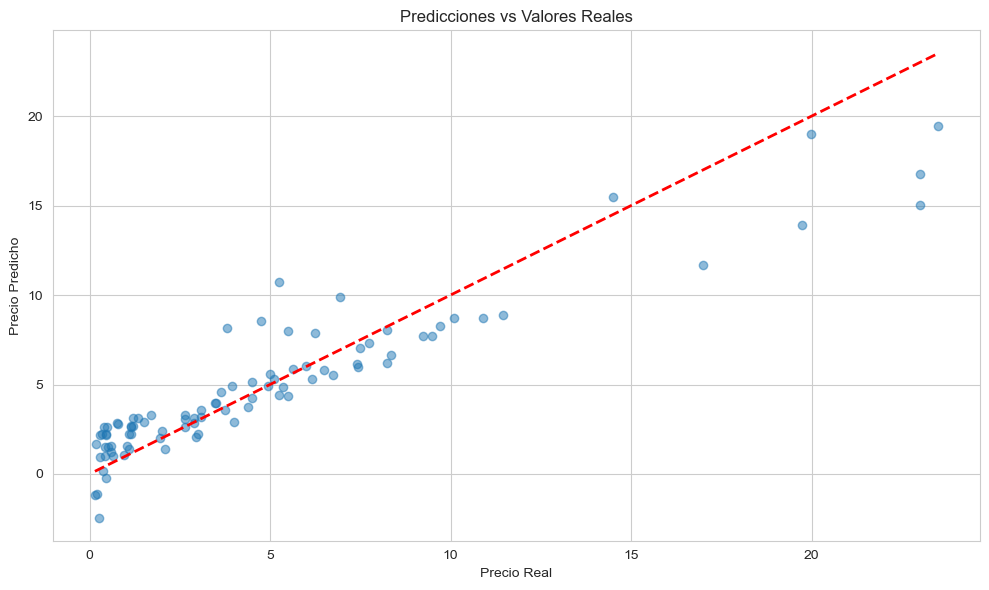

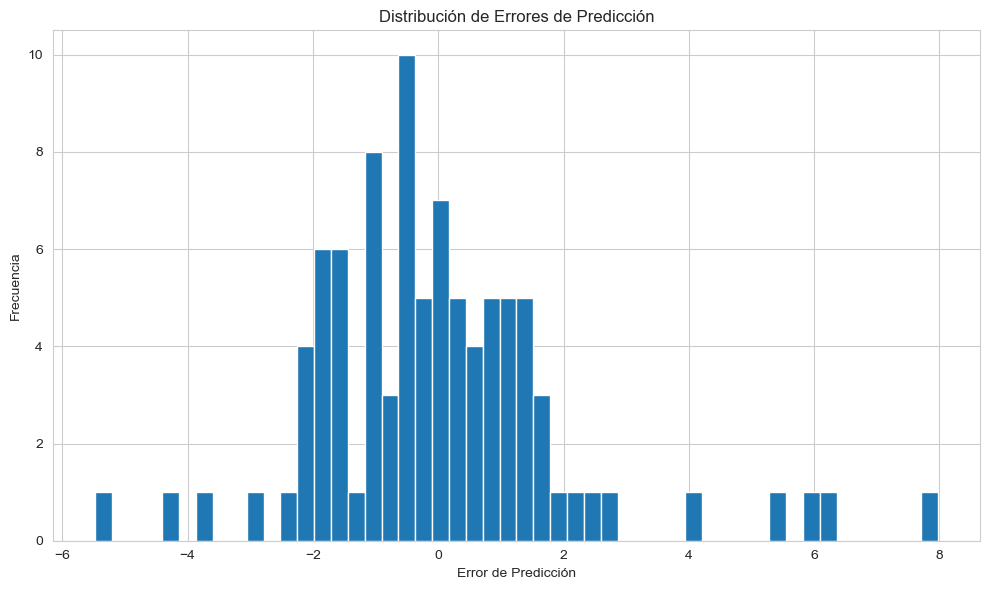

In [85]:
# Gráfico 1: Predicciones vs Valores Reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Precio Real')
plt.ylabel('Precio Predicho')
plt.title('Predicciones vs Valores Reales')
plt.tight_layout()
plt.show()

# Gráfico 2: Distribución de Errores
errors = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=50)
plt.xlabel('Error de Predicción')
plt.ylabel('Frecuencia')
plt.title('Distribución de Errores de Predicción')
plt.tight_layout()
plt.show()